In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
video = cv.VideoCapture("Video1_husky.mp4")

while video.isOpened():
    ret, frame = video.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

video.release()
cv.destroyAllWindows()

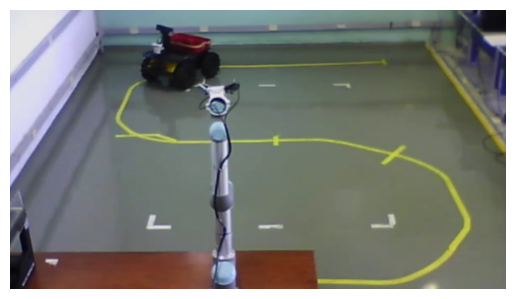

In [7]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
frame = frame.astype(np.double)
frame = frame / 255.

frame_channels = cv.split(frame)

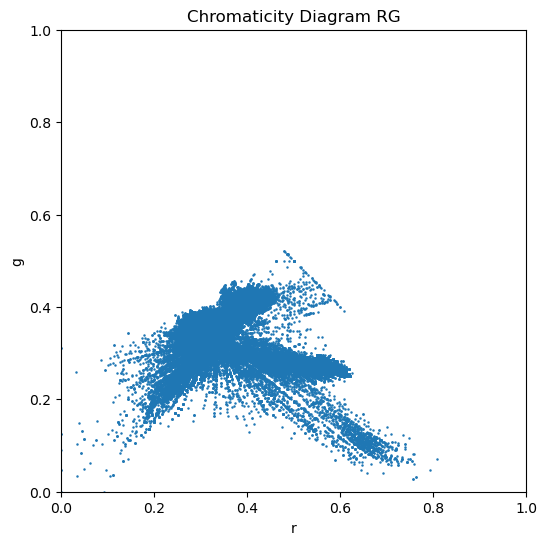

In [14]:
gray = frame_channels[0] + frame_channels[1] + frame_channels[2]
r = frame_channels[2] / gray
g = frame_channels[1] / gray
b = frame_channels[0] / gray

fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(x = r, y = g, s = 0.6)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_title('Chromaticity Diagram RG')
plt.show()

In [17]:
k = 3
data = np.column_stack((r.ravel(), g.ravel()))
kmean = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
kmean.fit(data)

C:\Users\Miguel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Miguel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Miguel\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Miguel\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Miguel\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _w

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
centers = kmean.cluster_centers_
labels = kmean.labels_
labels_image = labels.reshape(540, 960)

In [29]:
frame.shape[:2]

(540, 960)